# Importing data

In [ ]:
# Importing the data from kaggle (requires kaggle.json file from the profile page and join the cat vs dog competition on kaggle)
import kaggle
!kaggle competitions download -c dogs-vs-cats

 99% 804M/812M [00:11<00:00, 178MB/s]
100% 812M/812M [00:11<00:00, 75.6MB/s]


In [ ]:
# Extract the data dogs-vs-cats.zip (will be deleted on github)
from zipfile import ZipFile
with ZipFile('dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('data') # Put all the contents in the folder "data"
    print("Data extracted successfully")

Data extracted successfully


In [ ]:
# Extract the test set (will be deleted on github)
with ZipFile('data/test1.zip', 'r') as zip_ref:
    zip_ref.extractall('data/test1')  # Put all the contents in the folder "data/test1"
    print("Test set extracted successfully")

Test set extracted successfully


In [22]:
# Extract the train set (will be deleted on github)
with ZipFile('data/train.zip', 'r') as zip_ref:
    zip_ref.extractall('data/train')  # Put all the contents in the folder "data/train"
    print("Train set extracted successfully")

Train set extracted successfully


In [ ]:
# Counting the number of images in the train and test set
import os
train_dir = 'data/train/train'
test_dir = 'data/test1/test1'
print('Total training images:', len(os.listdir(train_dir))) # os.listdir returns a list containing the names of the entries in the directory given by path
print('Total test images:', len(os.listdir(test_dir)))

Total training images: 25000
Total test images: 12500


In [38]:
# import all necessary libraries
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2 # If you run locally on your machine
from google.colab.patches import cv2_imshow # If you are using colab

# Data Preprocessing

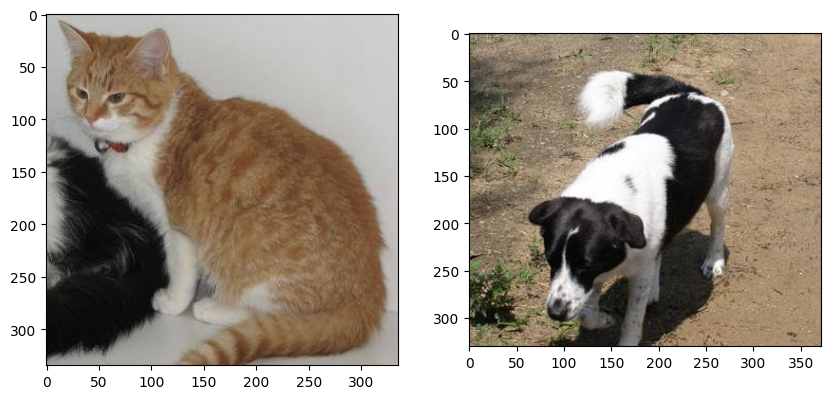

In [23]:
# Display a random cat and dog images
plt.figure(figsize=(10, 10)) # Set the size of the figure
img_cat = mpimg.imread('data/train/train/cat.3981.jpg')
img_dog = mpimg.imread('data/train/train/dog.11839.jpg')

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st position
plt.imshow(img_cat)

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd position
plt.imshow(img_dog)

plt.show()

In [16]:
# For loop to count the number of cats and dogs in the train set
cats = 0
dogs = 0
for img in os.listdir(train_dir):
    if 'cat' in img: # If the word 'cat' is in the image name
        cats += 1
    else:
        dogs += 1
print('Number of cats:', cats)
print('Number of dogs:', dogs)

Number of cats: 1000
Number of dogs: 1000


In [ ]:
# Split the cats and dogs images into 2 different directories, this is necessary for the Resizing and Sampling cats and dogs data
import shutil
# Create the directories
if not os.path.exists('data/train/cats'):
    os.mkdir('data/train/cats')

if not os.path.exists('data/train/dogs'):
    os.mkdir('data/train/dogs')

# Move the images to the respective directories
train_cats_dir = 'data/train/cats'
train_dogs_dir = 'data/train/dogs'
for img in os.listdir(train_dir):
    img_path = os.path.join(train_dir, img)
    if 'cat' in img:
        shutil.move(img_path, train_cats_dir)
    else:
        shutil.move(img_path, train_dogs_dir)

In [ ]:
# Create a directory for the reshaped images
train_reshaped_dir = 'data/train_reshaped'
if not os.path.exists(train_reshaped_dir):
    os.makedirs(train_reshaped_dir)

# Reshape and sampling 1000 images of each cats and dogs and save them in the train_reshaped directory
train_cats_dir = 'data/train/cats'
train_dogs_dir = 'data/train/dogs'
dir = [train_cats_dir, train_dogs_dir] # List of the cats and dogs directories
train_reshaped_dir = 'data/train_reshaped/'
for d in dir:
    for i in range(1000):
        filename = os.listdir(d)[i] # Get the filename of the image. E.g: cat.0.jpg
        img_path = os.path.join(d, filename) # Get the img_path by joining the train_dir and filename. E.g: data/train/train/cat.0.jpg

        # Read the image, convert it to RGB, reshape it
        img = cv2.imread(img_path) # Read the image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert the image to RGB
        img = cv2.resize(img, (224,224)) # Reshape the image

        # Saving the reshaped image
        new_filename = os.path.join(train_reshaped_dir, filename) # Get the new filename
        cv2.imwrite(new_filename, cv2.cvtColor(img, cv2.COLOR_RGB2BGR)) # Save the reshaped image



In [17]:
# For loop to count the number of cats and dogs in the train reshaped set
cats = 0
dogs = 0
for img in os.listdir(train_reshaped_dir):
    if 'cat' in img: # If the word 'cat' is in the image name
        cats += 1
    else:
        dogs += 1
print('Number of cats:', cats)
print('Number of dogs:', dogs)

Number of cats: 1000
Number of dogs: 1000


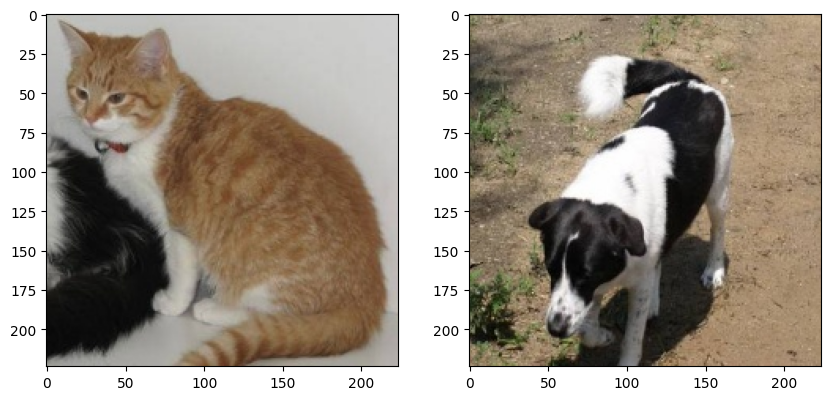

In [20]:
# Display a random resized cat and dog images
plt.figure(figsize=(10, 10)) # Set the size of the figure
img_cat = mpimg.imread('data/train_reshaped/cat.3981.jpg')
img_dog = mpimg.imread('data/train_reshaped/dog.11839.jpg')

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st position
plt.imshow(img_cat)

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd position
plt.imshow(img_dog)

plt.show()

In [24]:
# Label the images (0 for cats and 1 for dogs)
labels = []
for img in os.listdir(train_reshaped_dir):
    if 'cat' in img:
        labels.append(0)
    else:
        labels.append(1)

In [25]:
# Count the labels of cats and dogs
values, counts = np.unique(labels, return_counts=True)
print('Labels:', values)
print('Counts:', counts)

Labels: [0 1]
Counts: [1000 1000]


In [26]:
# Convert the reshaped images to an numpy array
images = []
for img in os.listdir(train_reshaped_dir):
    img_path = os.path.join(train_reshaped_dir, img)
    image = cv2.imread(img_path) # Read the image
    # Check if the image extension is .jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff, if not, append the image
    if image is not None:
        images.append(image)
images = np.array(images)


In [27]:
# Check the shape of the images
print(images.shape)
# Check the type of the images
print(type(images))

(2000, 224, 224, 3)
<class 'numpy.ndarray'>


# Spliting the data into train and test sets

In [28]:
# Split the data into training and testing set
X = images
y = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print('X_train shape:', X_train.shape)
print('y_train shape:', X_test.shape)

X_train shape: (1600, 224, 224, 3)
y_train shape: (400, 224, 224, 3)


In [30]:
# Scale the images from between 0 -> 255 to 0 -> 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Building the Neural Network

In [31]:
import tensorflow as tf
import tensorflow_hub as hub

In [32]:
# Mobile net model from tensorflow
pretrained_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
pretrained_model.trainable = False

# Create a model
num_classes = 2 # since we have 2 classes (cats and dogs)
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [33]:
# Fit the model (if your local machine don't have enough space, move to google colab)
model.fit(X_train, y_train,epochs=5)

Epoch 1/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 76s 44ms/step - accuracy: 0.9260 - loss: 0.1995
Epoch 2/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.9841 - loss: 0.0511
Epoch 3/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.9869 - loss: 0.0344
Epoch 4/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.9920 - loss: 0.0259
Epoch 5/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 89s 47ms/step - accuracy: 0.9976 - loss: 0.0122


In [35]:
# Evaluate the model
loss,acc = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test accuracy:', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9765 - loss: 0.0909
Test Loss: 0.11362101882696152
Test accuracy: 0.9649999737739563


# Predictive System

Enter the path of the image: /content/dog.jpg


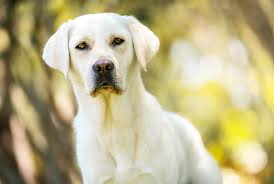

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The image is a dog


In [39]:
# Input the image
input_image_path = input('Enter the path of the image: ')
# input_image_path = "dog.jpg" # This is an example
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image) # cv2.imshow(input_image) if you are running on local machine

# Transform the image (include resize, scaled, convert to numpy)
input_image = cv2.resize(input_image, (224, 224))
input_image = input_image / 255.0
input_image = np.reshape(input_image, (1, 224, 224, 3))

# Input the prediction
prediction = model.predict(input_image)
input_image_class = np.argmax(prediction)

if input_image_class == 0:
    print('The image is a cat')
else:
    print('The image is a dog')